In [5]:
!git clone https://github.com/Bibek-Poudel/DNN_ECG_Implementation.git
!pip install ecg_plot

fatal: destination path 'DNN_ECG_Implementation' already exists and is not an empty directory.


In [6]:
import scipy.io
import glob
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import keras.backend as K
from keras.models import load_model
from keras.utils.np_utils import to_categorical
from keras import metrics

import tensorflow as tf
from scipy.io import loadmat
from sklearn.metrics import confusion_matrix

import ecg_plot

plt.rcParams['figure.dpi'] = 300
%config InlineBackend.figure_format = 'retina'

In [7]:
%cd DNN_ECG_Implementation

/content/DNN_ECG_Implementation


In [8]:
#STEP 1: LETS VISUALIZE THE DATASET (ECG FILES)

# Load all the files with .mat extension
dataDir = './training2017/'
files = sorted(glob.glob(dataDir+"*.mat"))
print(f"The total number of ECG files is:{len(files)}")

The total number of ECG files is:8528


In [9]:
data_labels=pd.read_csv('revised_label.csv', header=None)
print(data_labels.head())
print("...........")

"""
Since we have no header in the labels, header = None
The dataset it is listed as just filename and label
Hence, 8528 data points (entries) are shown, no value is missing
"""

print(f"The shape of labels is{data_labels.shape}")
print("...........")
data_labels.info()

#convert to numpy array
dl_array= data_labels.values


        0  1
0  A00001  N
1  A00002  N
2  A00003  N
3  A00004  A
4  A00005  A
...........
The shape of labels is(8528, 2)
...........
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8528 entries, 0 to 8527
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       8528 non-null   object
 1   1       8528 non-null   object
dtypes: object(2)
memory usage: 133.4+ KB


In [10]:
def plot_ECG(data):
    splitted=data.split('/')
    again_splitted=splitted[2].split('.')
    file_name=again_splitted[0]
    label=""
    for item in dl_array:
        if item[0] == file_name:
            label=item[1]
    if label=='N':
        class_name = "Normal Rhythm"
    elif label=='A':
        class_name = "Atrial Fibrilation"
    elif label =='O':
        class_name = "Other Abnormal"
    else: 
        class_name ="Noise"
    
    dat=loadmat(data)
    mat_data= dat['val'][0]
    # ecg_plot.plot_1(mat_data, sample_rate=300, title = 'ECG')
    # ecg_plot.show()
    x_axis = np.linspace(0.,float(len(mat_data)/300),num=len(mat_data))
    plt.rcParams.update({'font.size': 14})
    plt.figure(figsize=(16,5))
    plt.plot(x_axis, mat_data,'r')
    plt.axis([0, len(mat_data)/300,-2200, 2200])
    plt.title(class_name)
    plt.ylabel('milli Volts')
    plt.xlabel('Time (in seconds)')
    plt.tight_layout()
    plt.show()

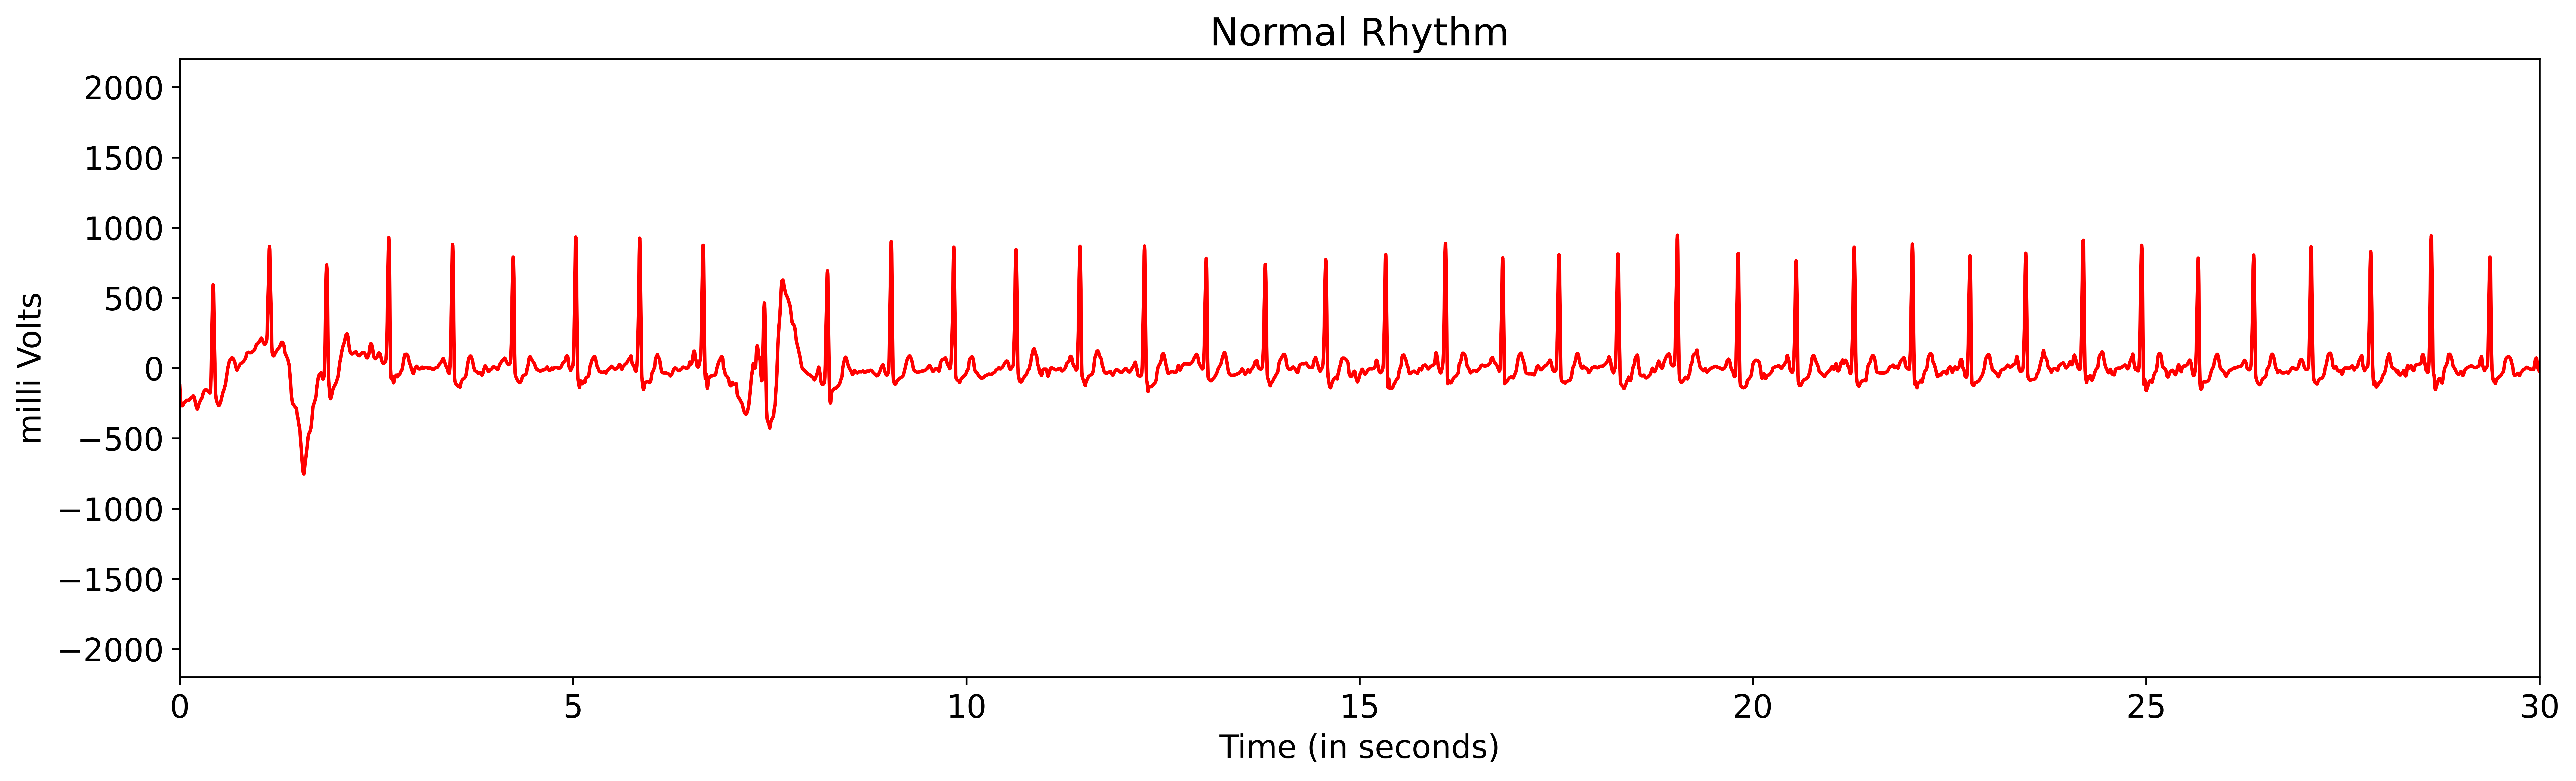

In [11]:
for i in range(1):
  plot_ECG(files[i])

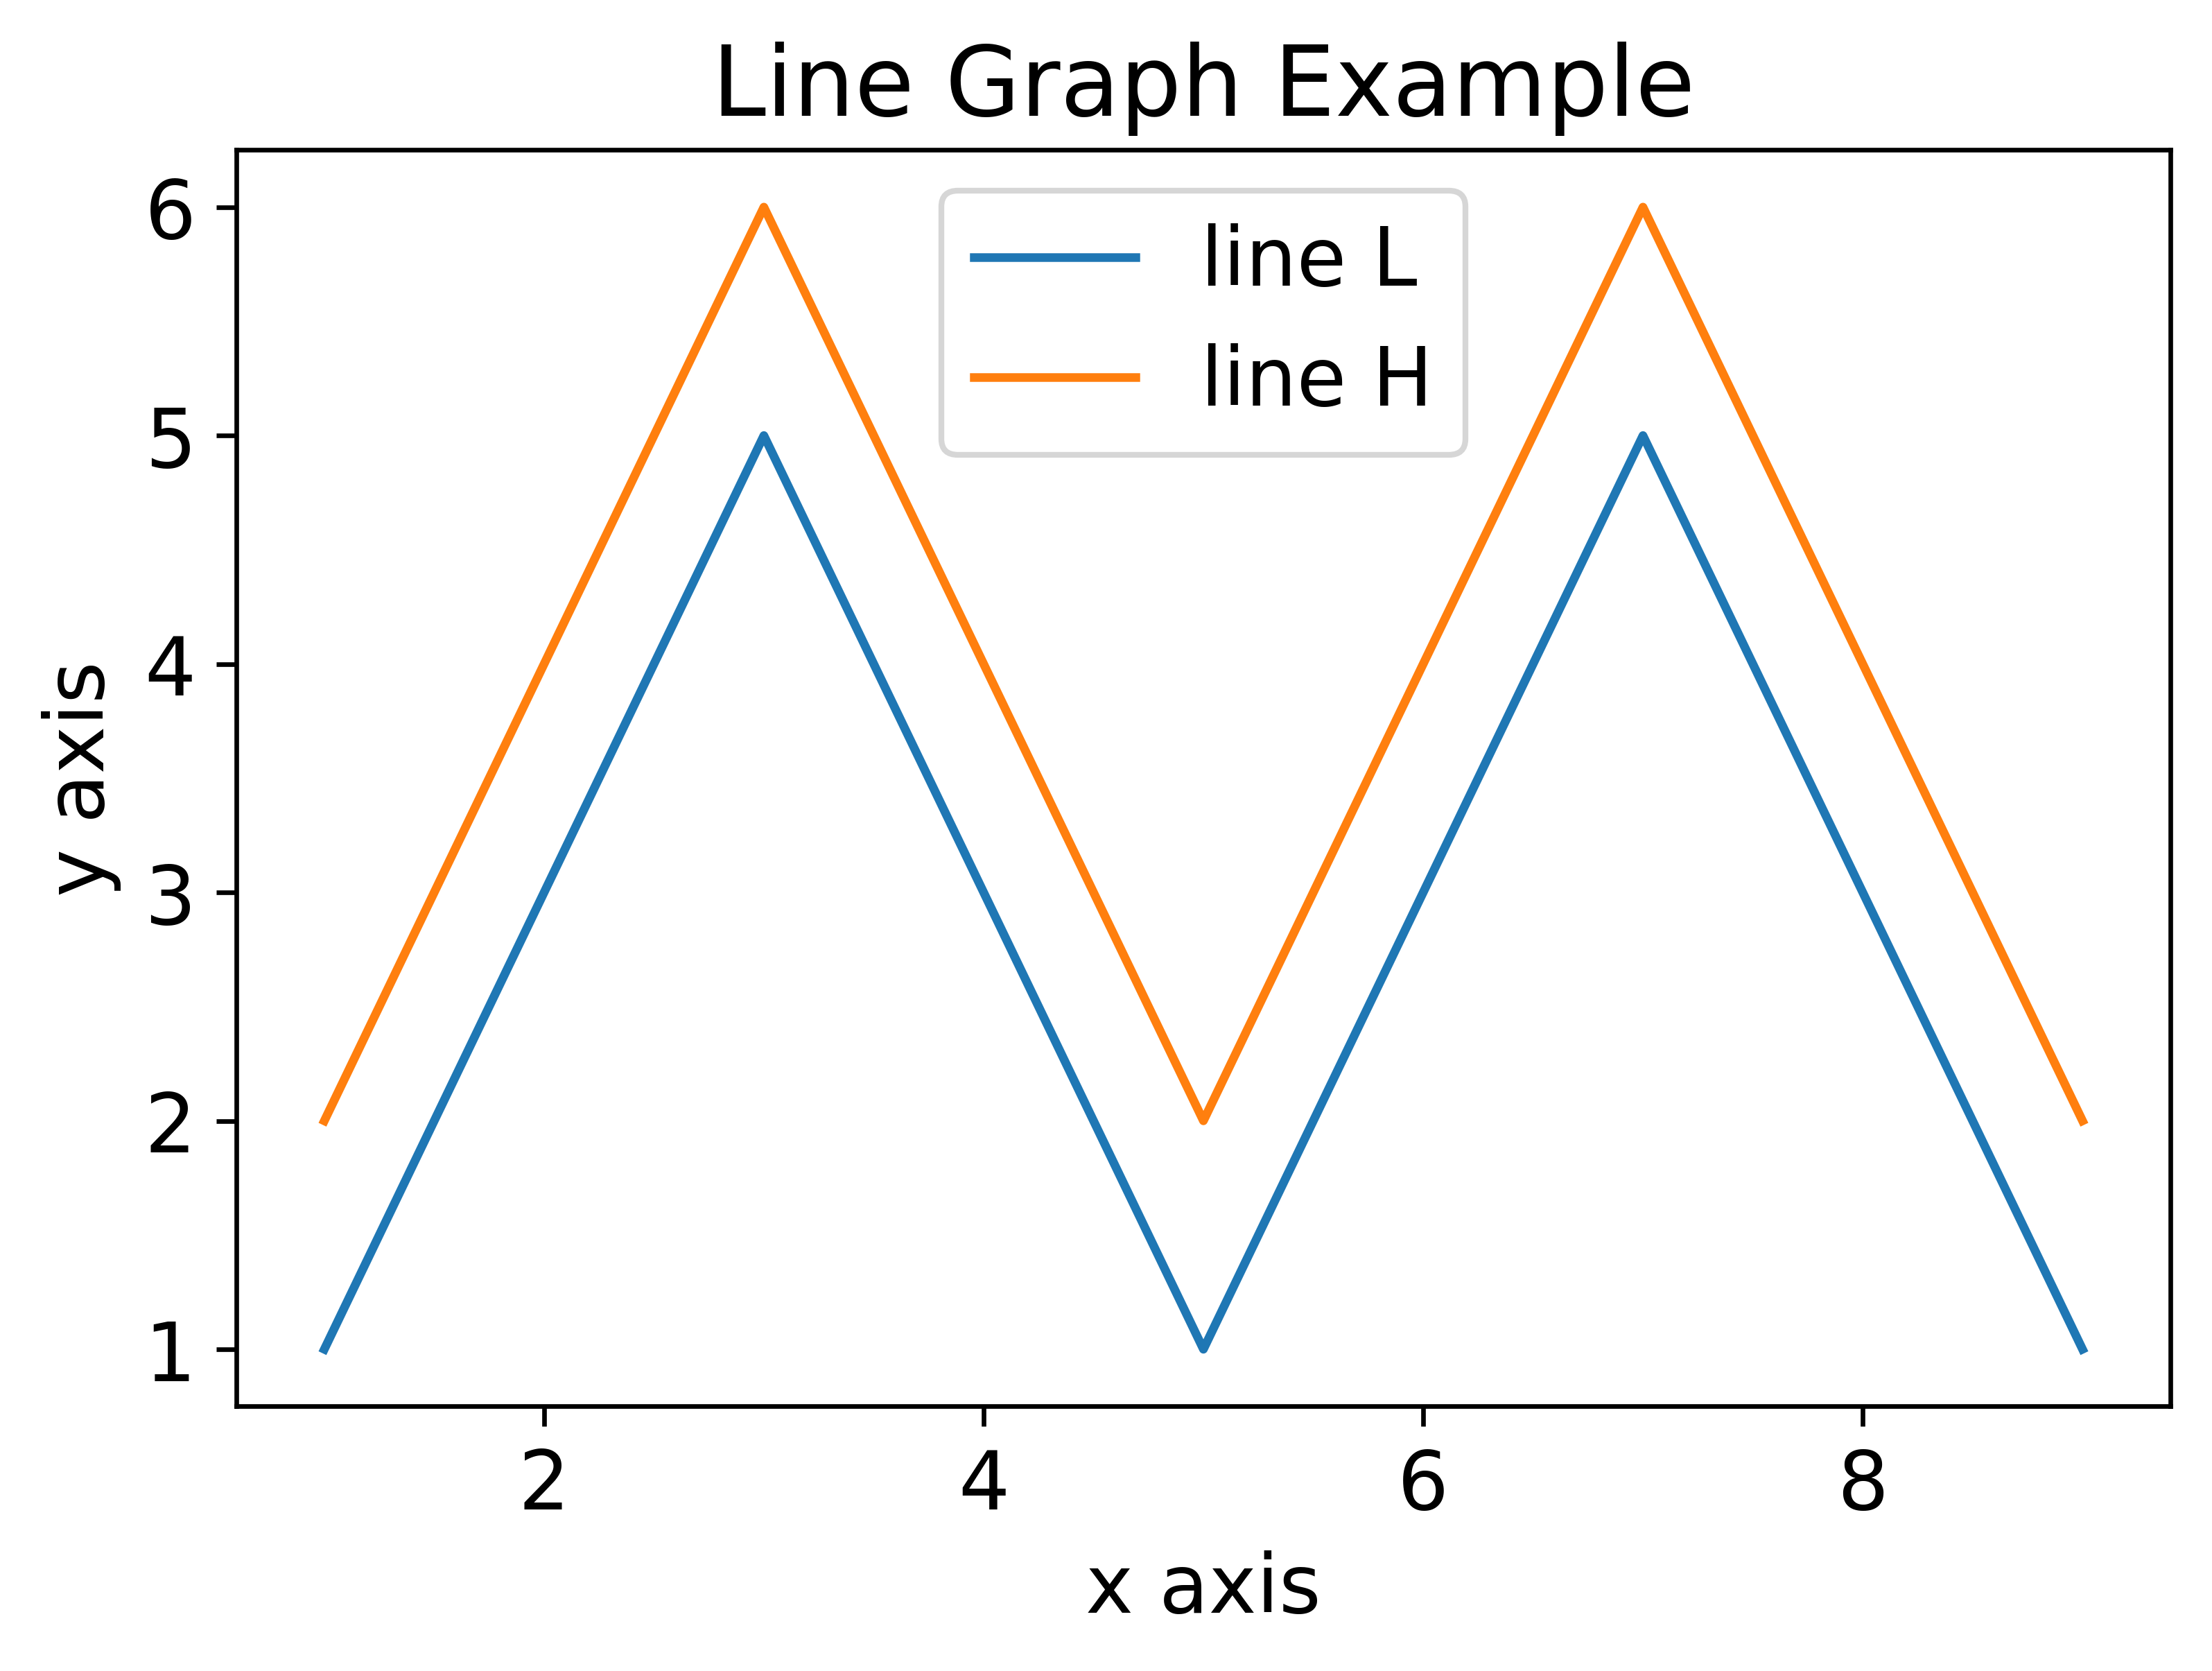

In [12]:
import matplotlib.pyplot as plt
 
x  = [1, 2, 3, 4, 5, 6, 7, 8, 9]
y1 = [1, 3, 5, 3, 1, 3, 5, 3, 1]
y2 = [2, 4, 6, 4, 2, 4, 6, 4, 2]
plt.plot(x, y1, label="line L")
plt.plot(x, y2, label="line H")
plt.plot()

plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("Line Graph Example")
plt.legend()
plt.show()